In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [8]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [9]:
data = pd.read_csv('csvs\encoding_data.csv')

In [10]:
data.columns

Index(['FlightNumber', 'PayloadMass', 'GridFins', 'Reused', 'Legs', 'Block',
       'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCSFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'S

In [14]:
X = pd.read_csv('csvs\encoding_data.csv')

In [15]:
X.head()

,FlightNumber,PayloadMass,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,False,False,False,1.0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X) 
X

array([[-1.71291154,  0.        , -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  0.53452248, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  0.53452248, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572,  0.53452248, ..., -0.21566555,
        -0.18569534,  9.43398113]])

In [ ]:
Y = pd.read_csv('csvs\Scrapped_dataset.csv')
Y = Y['Landing_Outcome']
Y = Y.apply(lambda x : 1 if x == 'Success' else 0)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

In [34]:
print ('Train set:')
print('X-train= ', X_train.shape,'Y-train= ',Y_train.shape)
print ('Test set:')
print('X-test= ', X_test.shape,  'Y-test= ',Y_test.shape)

Train set:
X-train=  (72, 79) Y-train=  (72,)
Test set:
X-test=  (18, 79) Y-test=  (18,)


In [35]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [36]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
# Create a logistic regression object
lr=LogisticRegression()

# Create a GridSearchCV object logreg_cv
logreg_cv = GridSearchCV(lr, parameters, cv=10)

#Fit the training data into the GridSearch object
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [37]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7339285714285714


In [38]:
print("Logistic Regression test data accuracy :",logreg_cv.score(X_test, Y_test))

Logistic Regression test data accuracy : 0.8888888888888888


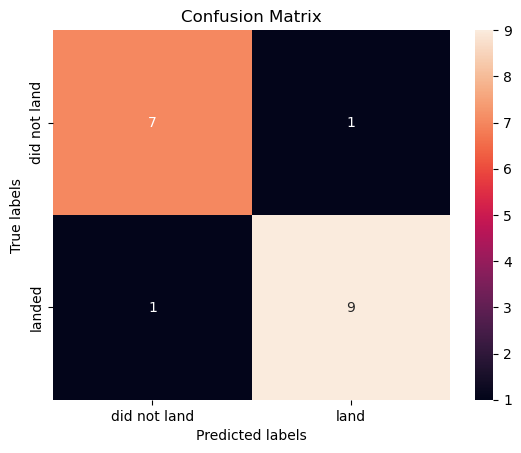

In [39]:
ytop=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,ytop)
plt.show()

In [40]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create a support vector machine
svm = SVC()

In [42]:
# create a GridSearchCV object svm_cv with cv = 10
svm_cv = GridSearchCV(svm, parameters, cv= 10)

#Fit the training data into the GridSearch object
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [43]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.7071428571428571


In [44]:
print("SVM test data accuracy :",svm_cv.score(X_test, Y_test))

SVM test data accuracy : 0.8333333333333334


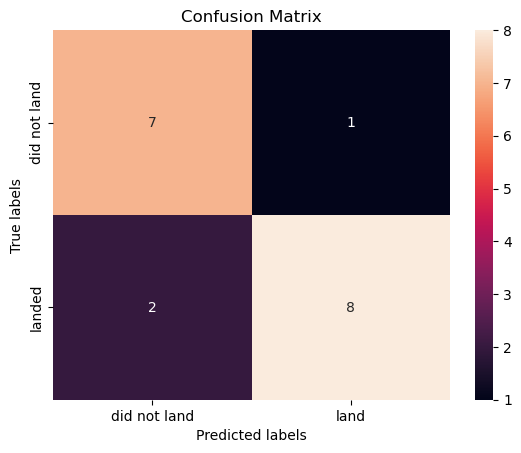

In [45]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [46]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

In [47]:
# create a GridSearchCV object tree_cv with cv = 10
tree_cv = GridSearchCV(tree, parameters, cv= 10)

#Fit the training data into the GridSearch object
tree_cv.fit(X_train, Y_train)

c:\Users\Vaishnav Anand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vaishnav Anand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vaishnav Anand\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Vaishnav Anand\anaconda3\Lib\site-packages\sklearn\ba

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [48]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.7642857142857142


In [49]:
print("Decision Tree accuracy on test set :",tree_cv.score(X_test, Y_test))

Decision Tree accuracy on test set : 0.6111111111111112


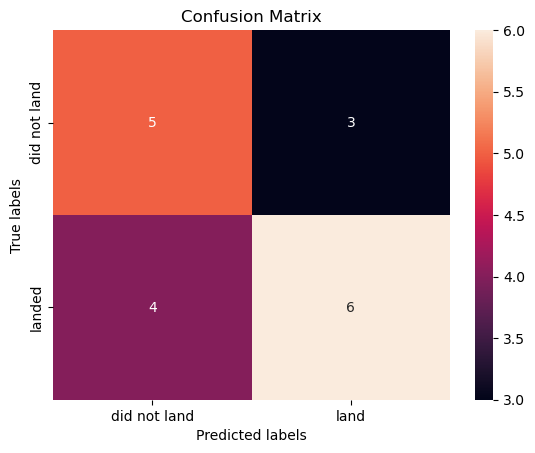

In [50]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [51]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Create a KNN classifier object
KNN = KNeighborsClassifier()

In [52]:
# create a GridSearchCV object knn_cv with cv = 10
knn_cv = GridSearchCV(KNN, parameters, cv= 10)

#Fit the training data into the GridSearch object
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [53]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.6660714285714285


In [54]:
knn_cv.score(X_test, Y_test)

0.7222222222222222

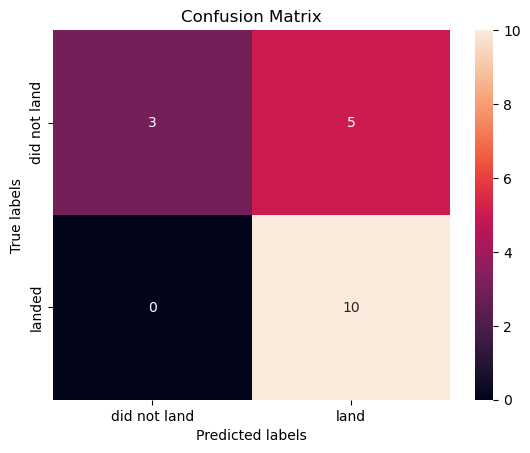

In [55]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [56]:

Report = pd.DataFrame({'Method' : ['Test Data Accuracy']})

knn_accuracy=knn_cv.score(X_test, Y_test)
Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
SVM_accuracy=svm_cv.score(X_test, Y_test)
Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [Logistic_Regression]
Report['SVM'] = [SVM_accuracy]
Report['Decision Tree'] = [Decision_tree_accuracy]
Report['KNN'] = [knn_accuracy]




Report.transpose()

,0
Method,Test Data Accuracy
Logistic_Reg,0.888889
SVM,0.833333
Decision Tree,0.611111
KNN,0.722222
